In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
print(data.head())

   SAMPLE_ID   MONTH  COUNT_OF_DISCONNECTED_DAYS  USAGE  PAYMENT  \
0          3  140205                           0    0.0        0   
1          3  140206                           0    0.0        0   
2          3  140207                           0    0.0        0   
3          3  140208                           0    0.0        0   
4          3  140209                           0    0.0        0   

   TOTAL_CALL_COUNT  COUNT_OF_TECHNICAL_PROBLEM_CALL  TRAFFIC_PACKAGE_TAG  \
0                 0                                0                    1   
1                 0                                0                    1   
2                 0                                0                    1   
3                 0                                0                    1   
4                 0                                0                    1   

   RETENTION_TAG  
0              0  
1              0  
2              0  
3              0  
4              0  


In [ ]:
# نمایش اطلاعات کلی داده‌ها
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876576 entries, 0 to 876575
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   SAMPLE_ID                        876576 non-null  int64  
 1   MONTH                            876576 non-null  int64  
 2   COUNT_OF_DISCONNECTED_DAYS       876576 non-null  int64  
 3   USAGE                            876576 non-null  float64
 4   PAYMENT                          876576 non-null  int64  
 5   TOTAL_CALL_COUNT                 876576 non-null  int64  
 6   COUNT_OF_TECHNICAL_PROBLEM_CALL  876576 non-null  int64  
 7   TRAFFIC_PACKAGE_TAG              876576 non-null  int64  
 8   RETENTION_TAG                    876576 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 60.2 MB
None


In [ ]:
# بررسی توزیع مقادیر در ستون‌ها
print(data.describe())


           SAMPLE_ID          MONTH  COUNT_OF_DISCONNECTED_DAYS  \
count  876576.000000  876576.000000               876576.000000   
mean   100071.175487  140205.505339                    2.867613   
std     57724.973781       2.212706                    6.767241   
min         3.000000  140201.000000                    0.000000   
25%     50095.750000  140204.000000                    0.000000   
50%    100155.500000  140206.000000                    0.000000   
75%    150035.250000  140207.000000                    1.000000   
max    199999.000000  140210.000000                   31.000000   

               USAGE       PAYMENT  TOTAL_CALL_COUNT  \
count  876576.000000  8.765760e+05     876576.000000   
mean        8.449208  2.358406e+04          0.230499   
std        11.131851  4.040673e+04          0.825950   
min         0.000000  0.000000e+00          0.000000   
25%         1.040000  0.000000e+00          0.000000   
50%         4.780000  6.502000e+03          0.000000   
75% 

In [ ]:
# بررسی مقادیر گم‌شده
print(data.isnull().sum())



SAMPLE_ID                          0
MONTH                              0
COUNT_OF_DISCONNECTED_DAYS         0
USAGE                              0
PAYMENT                            0
TOTAL_CALL_COUNT                   0
COUNT_OF_TECHNICAL_PROBLEM_CALL    0
TRAFFIC_PACKAGE_TAG                0
RETENTION_TAG                      0
dtype: int64


In [ ]:

# بررسی میانگین مصرف ترافیک در ماه‌های گذشته
data['AVG_USAGE'] = data.groupby('SAMPLE_ID')['USAGE'].transform('mean')
print(data['AVG_USAGE'])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
876571    3.338333
876572    3.338333
876573    3.338333
876574    3.338333
876575    3.338333
Name: AVG_USAGE, Length: 876576, dtype: float64


In [ ]:

# تبدیل ستون‌های تاریخ به datetime
data['MONTH'] = pd.to_datetime(data['MONTH'], format='%y%m%d')


In [ ]:
# مرتب‌سازی داده‌ها بر اساس SAMPLE_ID و MONTH
data = data.sort_values(['SAMPLE_ID', 'MONTH'])


In [ ]:
# تبدیل داده‌ها به یک آرایه numpy
X = data[['COUNT_OF_DISCONNECTED_DAYS', 'USAGE', 'PAYMENT', 'TOTAL_CALL_COUNT', 'COUNT_OF_TECHNICAL_PROBLEM_CALL', 'TRAFFIC_PACKAGE_TAG']].values
y = data['RETENTION_TAG'].values

# تبدیل داده‌ها به شکل [samples, timesteps, features]
X = X.reshape(-1, 6, X.shape[1])  # 6 نشان دهنده تعداد ماه‌ها (timesteps)
y = y[::6]  # استخراج برچسب نهایی برای هر سری زمانی (هر 6 سطر یک نمونه)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# ایجاد اسکیلر
scaler = MinMaxScaler()

# نرمال‌سازی داده‌های آموزشی
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)


In [ ]:
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها به آموزشی و اعتبارسنجی (70% آموزش، 30% اعتبارسنجی)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ساخت مدل LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# آموزش مدل
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3196/3196 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8745 - loss: 0.3331 - val_accuracy: 0.9072 - val_loss: 0.2472
Epoch 2/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9127 - loss: 0.2439 - val_accuracy: 0.9150 - val_loss: 0.2404
Epoch 3/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9162 - loss: 0.2401 - val_accuracy: 0.9188 - val_loss: 0.2498
Epoch 4/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9212 - loss: 0.2323 - val_accuracy: 0.9226 - val_loss: 0.2275
Epoch 5/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9235 - loss: 0.2312 - val_accuracy: 0.9203 - val_loss: 0.2295
Epoch 6/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9226 - loss: 0.2292 - val_accuracy: 0.9236 - val_loss: 0.2239
Epoch 7/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9250 - loss: 0.2250 - val_accuracy: 0.9260 - val_loss: 0.2227
Epoch 8/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9248 - loss

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ساخت مدل LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# ساخت مدل LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ایجاد checkpoint برای ذخیره بهترین مدل
checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

# نمایش فایل‌های موجود در مسیر
print(os.listdir('/content/'))



['.config', 'drive', 'sample_data']


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# ساخت مدل LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ایجاد checkpoint برای ذخیره بهترین مدل
checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_loss', mode='min')

# آموزش مدل با استفاده از checkpoint
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint])



Epoch 1/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8764 - loss: 0.3302 - val_accuracy: 0.9111 - val_loss: 0.2485
Epoch 2/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9088 - loss: 0.2515 - val_accuracy: 0.9174 - val_loss: 0.2362
Epoch 3/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9171 - loss: 0.2399 - val_accuracy: 0.9215 - val_loss: 0.2283
Epoch 4/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.9217 - loss: 0.2311 - val_accuracy: 0.9229 - val_loss: 0.2266
Epoch 5/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9230 - loss: 0.2292 - val_accuracy: 0.9238 - val_loss: 0.2237
Epoch 6/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9259 - loss: 0.2245 - val_accuracy: 0.9265 - val_loss: 0.2201
Epoch 7/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9253 - loss: 0.2236 - val_accuracy: 0.9260 - val_loss: 0.2200
Epoch 8/1000
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 

In [ ]:
# ارزیابی مدل
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy}')


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9356 - loss: 0.2010
Validation Accuracy: 0.9345867037773132


In [ ]:
# پیش‌بینی بر روی داده‌های اعتبارسنجی
y_pred = model.predict(X_val)

# تبدیل احتمالات به برچسب‌های باینری (0 یا 1)
y_pred = (y_pred > 0.5).astype(int)

# نمایش نتایج
print(y_pred)


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [ ]:
# بارگذاری داده‌های تست
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

# مرتب‌سازی داده‌ها بر اساس SAMPLE_ID و MONTH
test_data = test_data.sort_values(by=['SAMPLE_ID', 'MONTH'])

# تبدیل داده‌ها به یک آرایه numpy
X_test = test_data[['COUNT_OF_DISCONNECTED_DAYS', 'USAGE', 'PAYMENT', 'TOTAL_CALL_COUNT', 'COUNT_OF_TECHNICAL_PROBLEM_CALL', 'TRAFFIC_PACKAGE_TAG']].values

# تبدیل داده‌ها به شکل [samples, timesteps, features]
X_test = X_test.reshape(-1, 6, X_test.shape[1])

# نرمال‌سازی داده‌های تست
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)


In [ ]:
# پیش‌بینی بر روی داده‌های تست
y_test_pred = model.predict(X_test_scaled)

# تبدیل احتمالات به برچسب‌های باینری (0 یا 1)
y_test_pred = (y_test_pred > 0.5).astype(int)


1491/1491 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
# فرض کنید y_test_pred نتایج پیش‌بینی شما باشد
# تبدیل پیش‌بینی‌ها به DataFrame
output_df = pd.DataFrame(y_test_pred, columns=['PREDICTION'])

# ذخیره به صورت فایل CSV بدون هدر و اندیس
output_df.to_csv('/content/drive/MyDrive/submission.csv', index=False, header=False)


In [ ]:
from sklearn.metrics import f1_score

# ارزیابی مدل بر روی داده‌های اعتبارسنجی
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)

# محاسبه F1-Score
f1 = f1_score(y_val, y_val_pred, average='macro')
print(f'Validation F1-Score: {f1}')


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Validation F1-Score: 0.8734855561772197


**ARIMA**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
data = pd.read_csv('/content/drive/MyDrive/train.csv')

# مرتب‌سازی داده‌ها بر اساس SAMPLE_ID و MONTH
data = data.sort_values(by=['SAMPLE_ID', 'MONTH'])



In [ ]:
# انتخاب یک SAMPLE_ID خاص برای مثال (شما باید این کار را برای همه مشترکین انجام دهید)
sample_id = 3
sample_data = data[data['SAMPLE_ID'] == sample_id]

# انتخاب سری زمانی مربوط به مصرف ترافیک (USAGE)
usage_series = sample_data['USAGE'].values


In [ ]:
# نمایش داده‌های سری زمانی برای بررسی
print(usage_series)


[0. 0. 0. 0. 0. 0.]


In [ ]:
# فرض کنید سری زمانی دیگری با تنوع بیشتر انتخاب شده است
sample_id = 4  # تغییر شناسه نمونه به یک مقدار دیگر
sample_data = data[data['SAMPLE_ID'] == sample_id]
usage_series = sample_data['USAGE'].values

# بررسی مقادیر سری زمانی
print(usage_series)

# اجرای آزمون دیکی-فولر برای بررسی ایستایی
result = adfuller(usage_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# ادامه روند بر اساس توضیحات قبلی...


[0.06 0.05 0.42 1.01 0.23 0.17]
ADF Statistic: -1.9342629634879103
p-value: 0.31611830782992567


In [ ]:
# اگر p-value > 0.05 باشد، داده‌ها ایستا نیستند و نیاز به differencing دارند
if result[1] > 0.05:
    usage_series_diff = np.diff(usage_series)  # اجرای differencing برای ایستایی
else:
    usage_series_diff = usage_series

# ایجاد و آموزش مدل ARIMA
model = ARIMA(usage_series_diff, order=(1, 1, 1))  # order=(p, d, q) که p,d,q پارامترهای ARIMA هستند
model_fit = model.fit()



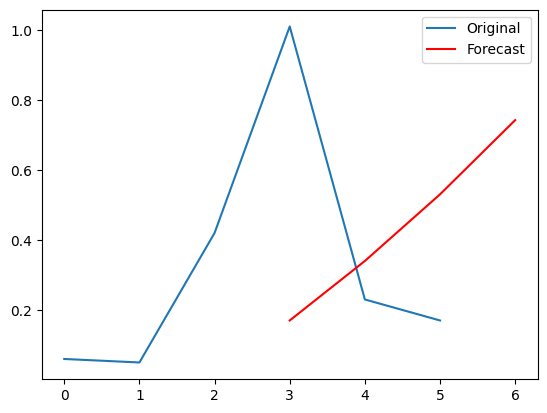

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید usage_series_diff و forecast محاسبه شده‌اند

# اگر از differencing استفاده کرده‌اید و forecast را به مقیاس اصلی بازگردانده‌اید:
if result[1] > 0.05:
    forecast = np.r_[usage_series[-1], forecast].cumsum()

# رسم نمودار
plt.plot(usage_series, label='Original')

# توجه کنید که محور x باید یک نقطه کمتر باشد تا با طول forecast برابر شود
plt.plot(np.arange(len(usage_series) - len(forecast) + 1, len(usage_series) + 1), forecast, label='Forecast', color='red')

plt.legend()
plt.show()


In [ ]:
print(data.describe())


           SAMPLE_ID          MONTH  COUNT_OF_DISCONNECTED_DAYS  \
count  876576.000000  876576.000000               876576.000000   
mean   100071.175487  140205.505339                    2.867613   
std     57724.973781       2.212706                    6.767241   
min         3.000000  140201.000000                    0.000000   
25%     50095.750000  140204.000000                    0.000000   
50%    100155.500000  140206.000000                    0.000000   
75%    150035.250000  140207.000000                    1.000000   
max    199999.000000  140210.000000                   31.000000   

               USAGE       PAYMENT  TOTAL_CALL_COUNT  \
count  876576.000000  8.765760e+05     876576.000000   
mean        8.449208  2.358406e+04          0.230499   
std        11.131851  4.040673e+04          0.825950   
min         0.000000  0.000000e+00          0.000000   
25%         1.040000  0.000000e+00          0.000000   
50%         4.780000  6.502000e+03          0.000000   
75% 

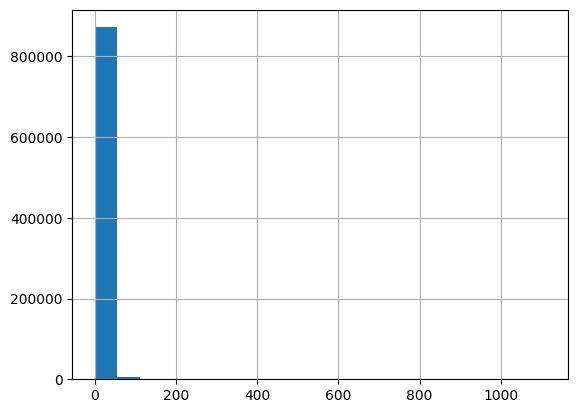

In [ ]:
data['USAGE'].hist(bins=20)
plt.show()


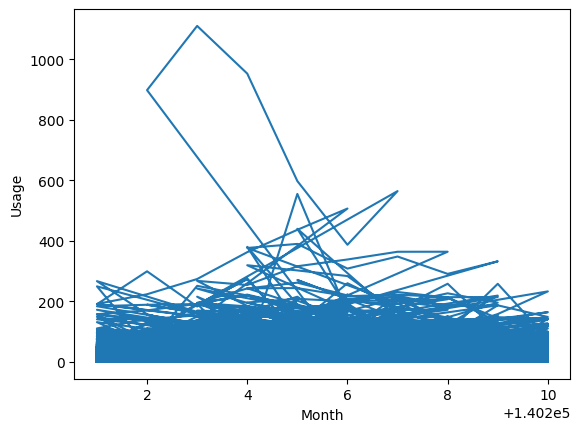

In [ ]:
plt.plot(data['MONTH'], data['USAGE'])
plt.xlabel('Month')
plt.ylabel('Usage')
plt.show()


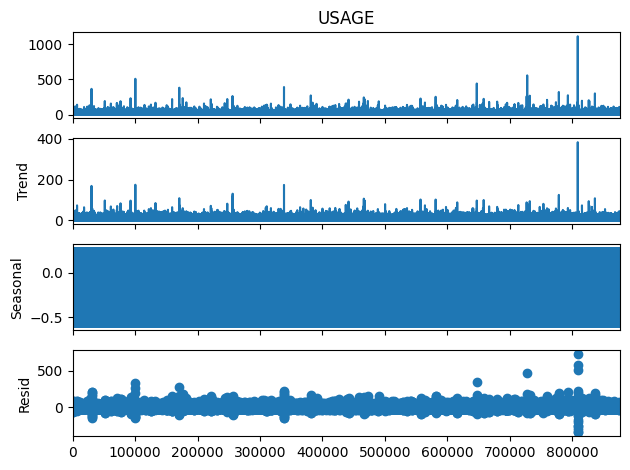

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data['USAGE'], period=12)  # period بسته به داده‌های شما متغیر است
decomposed.plot()
plt.show()


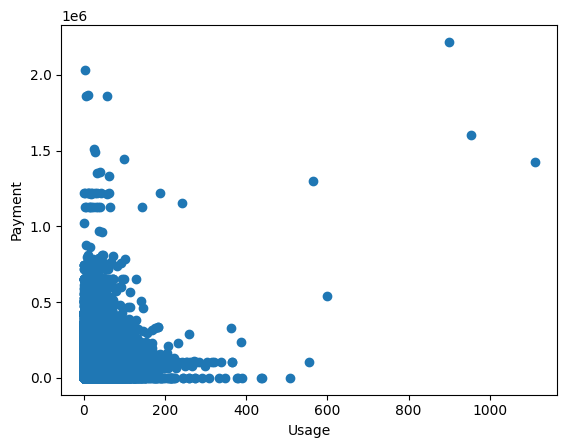

In [ ]:
plt.scatter(data['USAGE'], data['PAYMENT'])
plt.xlabel('Usage')
plt.ylabel('Payment')
plt.show()


In [ ]:
corr_matrix = data.corr()
print(corr_matrix)


                                 SAMPLE_ID     MONTH  \
SAMPLE_ID                         1.000000 -0.000980   
MONTH                            -0.000980  1.000000   
COUNT_OF_DISCONNECTED_DAYS        0.002035  0.084992   
USAGE                             0.000367 -0.015999   
PAYMENT                          -0.001121  0.026972   
TOTAL_CALL_COUNT                  0.002195  0.022713   
COUNT_OF_TECHNICAL_PROBLEM_CALL   0.001841 -0.004381   
TRAFFIC_PACKAGE_TAG              -0.002299 -0.041436   
RETENTION_TAG                    -0.001296 -0.004012   

                                 COUNT_OF_DISCONNECTED_DAYS     USAGE  \
SAMPLE_ID                                          0.002035  0.000367   
MONTH                                              0.084992 -0.015999   
COUNT_OF_DISCONNECTED_DAYS                         1.000000 -0.197636   
USAGE                                             -0.197636  1.000000   
PAYMENT                                           -0.088517  0.377456   
T

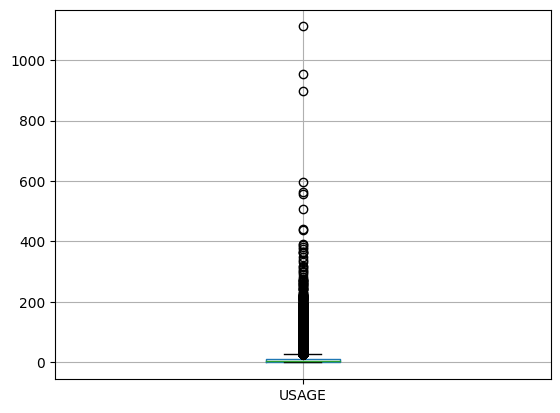

In [ ]:
data.boxplot(column=['USAGE'])
plt.show()


**GRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# تنظیم نرخ یادگیری (Learning Rate)
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# ساخت مدل GRU با Regularization و مدل پیچیده‌تر
model = Sequential()
model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # اضافه کردن Dropout برای Regularization
model.add(GRU(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))  # اضافه کردن Dropout برای Regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ایجاد checkpoint برای ذخیره بهترین مدل
checkpoint = ModelCheckpoint('/content/drive/MyDrive/gru_model_checkpoint.keras', save_best_only=True, monitor='val_loss', mode='min')

# آموزش مدل با استفاده از checkpoint
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint])




Epoch 1/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 68s 19ms/step - accuracy: 0.8547 - loss: 0.3908 - val_accuracy: 0.9071 - val_loss: 0.2494
Epoch 2/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 83s 20ms/step - accuracy: 0.9067 - loss: 0.2568 - val_accuracy: 0.9122 - val_loss: 0.2405
Epoch 3/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - accuracy: 0.9119 - loss: 0.2464 - val_accuracy: 0.9164 - val_loss: 0.2336
Epoch 4/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 85s 20ms/step - accuracy: 0.9172 - loss: 0.2370 - val_accuracy: 0.9188 - val_loss: 0.2309
Epoch 5/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.9158 - loss: 0.2418 - val_accuracy: 0.9207 - val_loss: 0.2293
Epoch 6/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 83s 20ms/step - accuracy: 0.9202 - loss: 0.2304 - val_accuracy: 0.9219 - val_loss: 0.2268
Epoch 7/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 79s 19ms/step - accuracy: 0.9214 - loss: 0.2301 - val_accuracy: 0.9232 - val_loss: 0.2249
Epoch 8/100
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 64s 20ms/step - accuracy: 

In [ ]:
# بارگذاری داده‌های تست
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

# مرتب‌سازی داده‌ها بر اساس SAMPLE_ID و MONTH
test_data = test_data.sort_values(by=['SAMPLE_ID', 'MONTH'])

# تبدیل داده‌ها به یک آرایه numpy
X_test = test_data[['COUNT_OF_DISCONNECTED_DAYS', 'USAGE', 'PAYMENT', 'TOTAL_CALL_COUNT', 'COUNT_OF_TECHNICAL_PROBLEM_CALL', 'TRAFFIC_PACKAGE_TAG']].values

# تبدیل داده‌ها به شکل [samples, timesteps, features]
X_test = X_test.reshape(-1, 6, X_test.shape[1])

# نرمال‌سازی داده‌های تست
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

In [ ]:
from sklearn.metrics import f1_score

# ارزیابی مدل بر روی داده‌های اعتبارسنجی
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)

# محاسبه F1-Score
f1 = f1_score(y_val, y_val_pred, average='macro')
print(f'Validation F1-Score: {f1}')

1370/1370 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
Validation F1-Score: 0.8829575378638512


In [ ]:
# پیش‌بینی بر روی داده‌های تست
y_test_pred = model.predict(X_test_scaled)

# تبدیل احتمالات به برچسب‌های باینری (0 یا 1)
y_test_pred = (y_test_pred > 0.5).astype(int)


1491/1491 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


In [ ]:
from sklearn.metrics import f1_score

# ارزیابی مدل بر روی داده‌های اعتبارسنجی
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)

# محاسبه F1-Score
f1 = f1_score(y_val, y_val_pred, average='macro')
print(f'Validation F1-Score: {f1}')


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Validation F1-Score: 0.8829575378638512


In [ ]:
# فرض کنید y_test_pred نتایج پیش‌بینی شما باشد
# تبدیل پیش‌بینی‌ها به DataFrame
output_df = pd.DataFrame(y_test_pred, columns=['PREDICTION'])

# ذخیره به صورت فایل CSV بدون هدر و اندیس
output_df.to_csv('/content/drive/MyDrive/submission2.csv', index=False, header=False)
